## PCA (Principal component analysis)
### What is PCA?
PCA is commonly known as a dimensionality reduction algorithm, but it can also be used to visualize data (as high dimensions of data can be hard to visualize)

In PCA, the relationship between independent variables and dependent variable is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset.

### Great, what are the steps to do PCA?
1. Standardize the range of continuous initial variables
2. Compute the covariance matrix to identify correlations
3. Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
4. Create a feature vector to decide which principal components to keep, basically keeping k eigenvalues
5. Recast the data along the principal components axes

### What are eigenvalues and eigenvectors?
Eigenvalues is a nonzero vector that changes at most by a scalar factor when that linear transformation is applied to it. The corresponding eigenvalue is the factor by which the eigenvector is scaled.

### 1. PCA for visualization

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [18]:
from sklearn.decomposition import PCA

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In classification problems, we can actually feed the pca transformed data to your desired models (logistic regression, SVM etc.) and then compare the relationship between number of components vs the variance explained, accuracy, computation time etc.

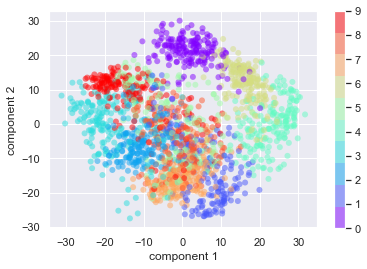

In [19]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [20]:
print(pca.components_)

[[ 1.11022302e-16 -1.73094658e-02 -2.23428839e-01 -1.35913319e-01
  -3.30323143e-02 -9.66340553e-02 -8.32942064e-03  2.26900171e-03
  -3.20516590e-04 -1.19308909e-01 -2.44451670e-01  1.48512738e-01
  -4.67319685e-02 -2.17740749e-01 -1.48136712e-02  4.47779386e-03
  -4.94137116e-05 -7.95419406e-02  8.33951793e-02  2.15915351e-01
  -1.72126779e-01 -1.63712117e-01  2.86444244e-02  4.23251591e-03
   9.85488304e-05  6.42319136e-02  2.54093319e-01 -3.56771121e-02
  -2.09462524e-01 -4.31311571e-02  5.13118345e-02  2.13422653e-04
   0.00000000e+00  1.59950891e-01  3.68690742e-01  1.64406772e-01
   8.52008026e-02  3.72983201e-02  2.15866969e-02  0.00000000e+00
   1.28865619e-03  1.06945314e-01  3.03067489e-01  2.47813064e-01
   2.09637298e-01  1.22325436e-02 -3.69458432e-02  1.61485011e-03
   6.93023776e-04 -8.35143100e-03 -5.58598666e-02  9.30534282e-02
   1.07387702e-01 -1.37734589e-01 -6.32879471e-02  9.61668083e-04
   9.55081866e-06 -1.40786834e-02 -2.35675488e-01 -1.41225602e-01
  -9.15966

In [21]:
print(pca.explained_variance_)


[179.0069301  163.71774688]


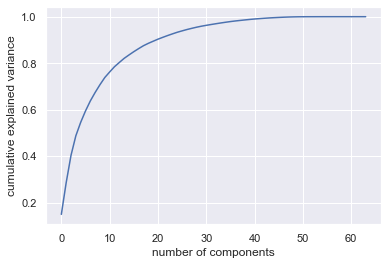

In [22]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

From here, we can see that at n=20, the components can describe approx. 90% of the variance. That means that there might be redundancy as the rest of the components account for only about 10% of variance

### 2. PCA for Noise Filtering

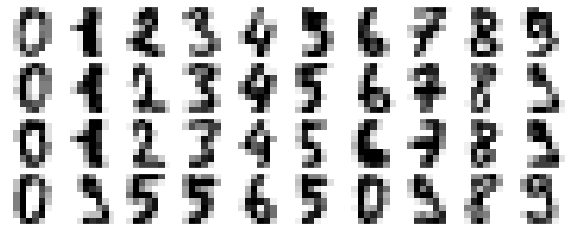

In [23]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

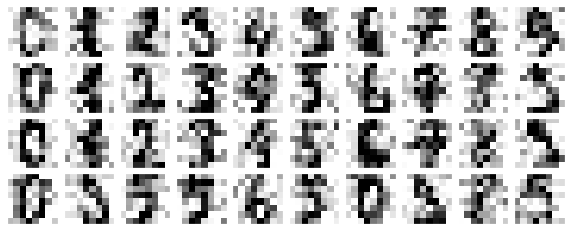

In [24]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [35]:
# train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

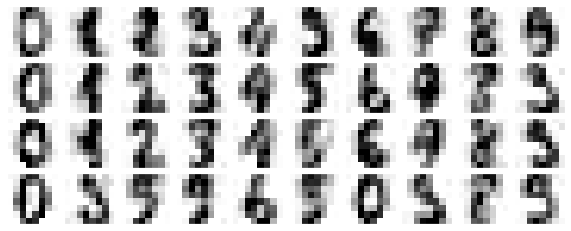

In [36]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Note that PCA does not eliminate noise, but it can help reduce noise. Nevertheless, this signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.